# Explore here

In [35]:
import os
import pandas as pd

from dotenv import load_dotenv

load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


In [36]:
import base64
import requests 

# Encode the client credentials
client_credentials = f"{client_id}:{client_secret}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Prepare the token request
token_url = "https://accounts.spotify.com/api/token"
headers = {
    "Authorization": f"Basic {client_credentials_base64.decode()}"
}
data = {
    "grant_type": "client_credentials"
}

# Request access token
response = requests.post(token_url, headers=headers, data=data)

# Check if the request was successful
if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained!")
else:
    print(f"Failed to obtain access token. Status code: {response.status_code}")
    print(response.text)

Access token obtained!


In [43]:
headers = {
    "Authorization": f"Bearer {access_token}"
}

search_url = "https://api.spotify.com/v1/search"
params = {
    "q": "Tool", 
    "type": "artist",
    "limit": 1
}

response = requests.get(search_url, headers=headers, params=params)

if response.status_code == 200:
    response_data = response.json()
    # print(f"Response Data: {response_data}")
    artist_id = response_data['artists']['items'][0]['id']
    artist_name = response_data['artists']['items'][0]['name']
    print(f"Found artist: {artist_name} (ID: {artist_id})")
else:
    print(f"Failed to search for artist. Status code: {response.status_code}")
    print(response.text)

Found artist: TOOL (ID: 2yEwvVSSSUkcLeSTNyHKh8)


In [44]:
top_tracks_url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks"
params = {
    "market": "US"
}

response = requests.get(top_tracks_url, headers=headers, params=params)

if response.status_code == 200:
    top_tracks_data = response.json()
    print(f"Top tracks for {artist_name}:")
    for idx, track in enumerate(top_tracks_data['tracks'], start=1):
        track_name = track['name']
        album_name = track['album']['name']
        popularity = track['popularity'] 
        duration_ms = track['duration_ms'] 
        duration_min = duration_ms / 60000
        print(f"{idx}. {track_name} - Album: {album_name} Popularity: {popularity} Duration: {duration_min}")
else:
    print(f"Failed to get top tracks. Status code: {response.status_code}")
    print(response.text)

Top tracks for TOOL:
1. Schism - Album: Lateralus Popularity: 68 Duration: 6.72555
2. The Pot - Album: 10,000 Days Popularity: 67 Duration: 6.365766666666667
3. Sober - Album: Undertow Popularity: 67 Duration: 5.114216666666667
4. Forty Six & 2 - Album: Ænima Popularity: 67 Duration: 6.0511
5. Stinkfist - Album: Ænima Popularity: 66 Duration: 5.202
6. Pneuma - Album: Fear Inoculum Popularity: 63 Duration: 11.886516666666667
7. Vicarious - Album: 10,000 Days Popularity: 62 Duration: 7.1113333333333335
8. Parabola - Album: Lateralus Popularity: 62 Duration: 6.061333333333334
9. Jambi - Album: 10,000 Days Popularity: 61 Duration: 7.476883333333333
10. Ænema - Album: Ænima Popularity: 60 Duration: 6.654433333333333


In [42]:
import pandas as pd
df_sorted = df.sort_values(by='popularity', ascending=False)

top_3_songs = df_sorted.head(3)

print("Top 3 Most Popular Songs:")
print(top_3_songs[['name', 'popularity']])

Top 3 Most Popular Songs:
      name  popularity
0   Schism          68
1  The Pot          67
2    Sober          67


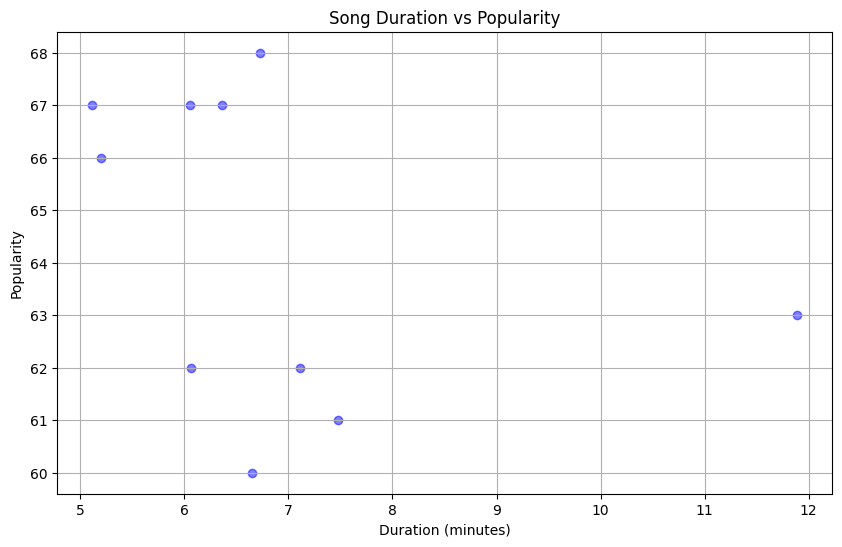

There seems to be no correlation between how long a song is and its popularity. With the band Tool there is no direct
link of what makes their songs more popular: -0.3490861074822386


In [45]:
import matplotlib.pyplot as plt
df['duration_min'] = df['duration_ms'] / 60000

plt.figure(figsize=(10, 6))
plt.scatter(df['duration_min'], df['popularity'], color='blue', alpha=0.5)
plt.title('Song Duration vs Popularity')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

correlation = df['duration_min'].corr(df['popularity'])
print(f"There seems to be no correlation between how long a song is and its popularity. With the band Tool there is no direct")
print(f"link of what makes their songs more popular: {correlation}")